<a href="https://colab.research.google.com/github/paruliansaragi/DL-Notebooks/blob/master/HappyHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle


    100% |████████████████████████████████| 61kB 2.8MB/s 
    100% |████████████████████████████████| 235kB 6.0MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
#connect to api
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d iarunava/happy-house-dataset

 67% 5.00M/7.49M [00:00<00:00, 42.6MB/s]
100% 7.49M/7.49M [00:00<00:00, 58.5MB/s]


In [0]:
!unzip happy-house-dataset.zip

Archive:  happy-house-dataset.zip
  inflating: train_happy.h5          
  inflating: test_happy.h5           


In [0]:
!pip install pydot

    100% |████████████████████████████████| 133kB 4.3MB/s 
  Running setup.py bdist_wheel for pydot ... - done
  Stored in directory: /root/.cache/pip/wheels/6a/a5/14/25541ebcdeaf97a37b6d05c7ff15f5bd20f5e91b99d313e5b4
Successfully built pydot


In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline
import h5py

In [0]:
import os

os.makedirs('datasets', exist_ok=True)

In [0]:
!mv test_happy.h5 'datasets'

In [0]:
!mv train_happy.h5 'datasets'

In [0]:
import keras.backend as K
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def load_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [0]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
        # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model
    ### END CODE HERE ###
    
    return model

In [0]:
### START CODE HERE ### (1 line)
happyModel = HappyModel(X_train.shape[1:])
### END CODE HERE ###

In [0]:
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [0]:
happyModel.fit(X_train, Y_train, epochs=40, batch_size=50)

Epoch 1/40
600/600 [==============================] - 10s 17ms/step - loss: 1.4515 - acc: 0.6250
Epoch 2/40
600/600 [==============================] - 10s 17ms/step - loss: 0.3451 - acc: 0.8450
Epoch 3/40
600/600 [==============================] - 10s 16ms/step - loss: 0.2047 - acc: 0.9217
Epoch 4/40
600/600 [==============================] - 10s 17ms/step - loss: 0.1338 - acc: 0.9583
Epoch 5/40
600/600 [==============================] - 10s 16ms/step - loss: 0.1053 - acc: 0.9650
Epoch 6/40
600/600 [==============================] - 10s 16ms/step - loss: 0.0906 - acc: 0.9750
Epoch 7/40
600/600 [==============================] - 10s 16ms/step - loss: 0.0907 - acc: 0.9783
Epoch 8/40
600/600 [==============================] - 10s 16ms/step - loss: 0.0948 - acc: 0.9633
Epoch 9/40
600/600 [==============================] - 10s 17ms/step - loss: 0.0964 - acc: 0.9667
Epoch 10/40
600/600 [==============================] - 10s 16ms/step - loss: 0.0667 - acc: 0.9750
Epoch 11/40
600/600 [========

Note that if you run fit() again, the model will continue to train with the parameters it has already learnt instead of reinitializing them.

In [0]:
### START CODE HERE ### (1 line)
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 0.12259087920188903
Test Accuracy = 0.9466666642824809


[[1.]]


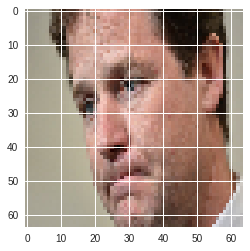

In [0]:
### START CODE HERE ###
img_path = 'klegg.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))